In [15]:
import tensorflow as tf

In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing


c:\Users\Bayan Ali\anaconda3\envs\new_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Bayan Ali\anaconda3\envs\new_env\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Bayan Ali\anaconda3\envs\new_env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [48]:


class Classification():

    def __init__(self, data):
        self.data = data

    def prepare_classification(self, target, list_fit):
        self.y = self.data[target]
        
        self.x= self.data.drop(list_fit, axis = 1)
        print(type(self.x))


    def model_classification(self, max_depth):
        self.X_train = self.x
        self.Y_train  = self.y
        #print(self.X_train.shape,  self.Y_train.shape)
        self.clf = DecisionTreeClassifier(criterion = 'gini', max_depth= max_depth)
        self.clf = self.clf.fit(self.X_train, self.Y_train)
    
    def vizualize_tree(self, feature_name):
        dot_data = tree.export_graphviz(self.clf,
                                            out_file=None,
                                            feature_names=self.X_train.columns.values,
                                            class_names = self.clf.classes_,
                                            filled=True)
        graph = graphviz.Source(dot_data, format = "svg")
        graph.render("C:/Users/Bayan Ali/Desktop/SpotTheBot/Classificaion results/"+feature_name+"final_decision_tree_entropy_graphivz")
        graph = graphviz.Source(dot_data, format = "png")
        graph.render("C:/Users/Bayan Ali/Desktop/SpotTheBot/Classificaion results/"+feature_name+"final_decision_tree_entropy_graphivz")
        graph = graphviz.Source(dot_data, format = "eps")
        graph.render("C:/Users/Bayan Ali/Desktop/SpotTheBot/Classificaion results/"+feature_name+"final_decision_tree_entropy_graphivz")

    def visualize_importance(self,color, feature_name):
        plt.figure(figsize=(5,3))
        plt.title("Feature importance - "+feature_name, fontsize=13, fontweight='bold', fontname='Times New Roman')
        plt.barh( ["xmin DC", "τ DC", "xmin KS", "τ KS"] , self.clf.feature_importances_, color = color, height = 0.3)
        plt.yticks(fontsize=9, fontweight='bold', fontname='Times New Roman')
        plt.savefig("C:/Users/Bayan Ali/Desktop/SpotTheBot/Classificaion results/"+feature_name+"feature_importances.svg")
        plt.savefig("C:/Users/Bayan Ali/Desktop/SpotTheBot/Classificaion results/"+feature_name+"feature_importances.png")
        plt.savefig("C:/Users/Bayan Ali/Desktop/SpotTheBot/Classificaion results/"+feature_name+"feature_importances.eps")
        plt.show()
        plt.close()






In [44]:
#parameters 
list_fit = [ "Word order","Locus of marking","Alignment","Complexity",	"Head directionality"]
list_depth = [3, 3, 3, 3, 3]

In [45]:
def read_data():
    data = pd.read_csv("C:/Users/Bayan Ali/Desktop/SpotTheBot/Clustering.csv")
    df_data =  pd.DataFrame(data)
    df_data = df_data.drop(["N","Languages","Estimated Alpha (Hill)","(Prussner - KS)/Prussner","Abs","<=0.1"], axis = 1) #"xmin based on data collapse","xmin based on KS"
    #df_data = df_data.drop(list_fit, axis = 1)
    return df_data

In [46]:
df_data = read_data()
df_data.head()

,xmin based on data collapse,alpha based on data collapse,xmin based on KS,alpha based on KS,Word order,Locus of marking,Alignment,Complexity,Head directionality
0,8020,3.3,8758,3.55,SOV,Inconsistent,Accusative,Synthetic,LL
1,201,3.2,200,3.45,SVO,Inconsistent,Accusative,Synthetic,R
2,51,3.0,50,3.10,SVO,Dependent,Accusative,Synthetic,R
3,1001,3.5,1014,3.30,SOV,Inconsistent,Ergative,Synthetic,LL
4,1001,2.0,1178,2.15,SVO,Dependent,Accusative,Synthetic,R


<class 'pandas.core.frame.DataFrame'>


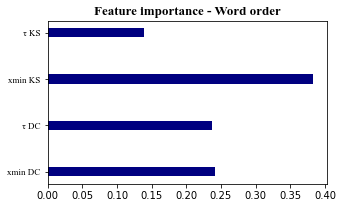

<class 'pandas.core.frame.DataFrame'>


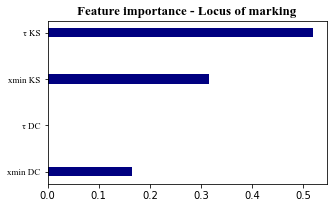

<class 'pandas.core.frame.DataFrame'>


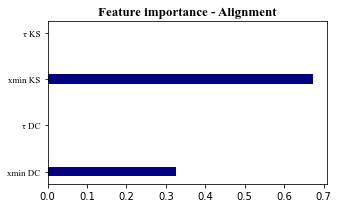

<class 'pandas.core.frame.DataFrame'>


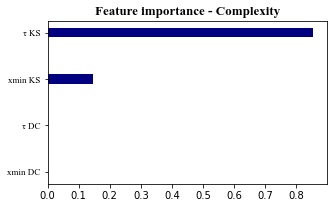

<class 'pandas.core.frame.DataFrame'>


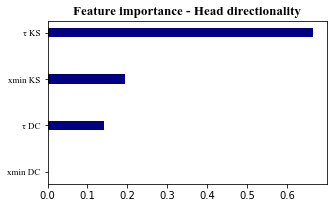

In [49]:
df_data = read_data()
df_data.head()
for item, depth in zip(list_fit, list_depth):
    
    obj_classification = Classification(df_data)
    obj_classification.prepare_classification(item, list_fit)
    clf = obj_classification.model_classification(depth)
    obj_classification.vizualize_tree(item)
    obj_classification.visualize_importance("navy", item)